Stock Market Prediction and forecasting using Stacked LSTM

In [45]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [46]:
Data=pd.read_csv("Stok.csv")

In [47]:
Data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [48]:
Data.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [49]:
Data.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [50]:
Data1=Data['Close']

In [51]:
Data1


0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

In [52]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler(feature_range=(0,1))
Data1=scaler.fit_transform(np.array(Data1).reshape(-1,1))


In [53]:
Data1

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

In [54]:
training_size=int(len(Data1)*0.65)
test_size=len(Data1)-training_size

train_data,test_data =Data1[0:training_size,:],Data1[training_size:len(Data1),:1]

In [55]:
training_size

1322

In [56]:
len(test_data)

713

In [58]:
import numpy

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)


In [59]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data,time_step)

In [60]:
print(X_train.shape), print(y_train.shape)

(1221, 100)
(1221,)


(None, None)

In [61]:
print(X_test.shape),print(ytest.shape)

(612, 100)
(612,)


(None, None)

In [63]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)


In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [65]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [66]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [67]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
20/20 [==============================] - 11s 270ms/step - loss: 0.0315 - val_loss: 0.0033
Epoch 2/100
20/20 [==============================] - 3s 161ms/step - loss: 0.0039 - val_loss: 0.0015
Epoch 3/100
20/20 [==============================] - 3s 169ms/step - loss: 0.0020 - val_loss: 0.0012
Epoch 4/100
20/20 [==============================] - 3s 163ms/step - loss: 0.0016 - val_loss: 0.0011
Epoch 5/100
20/20 [==============================] - 3s 167ms/step - loss: 0.0016 - val_loss: 0.0011
Epoch 6/100
20/20 [==============================] - 3s 169ms/step - loss: 0.0015 - val_loss: 9.5225e-04
Epoch 7/100
20/20 [==============================] - 3s 168ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 8/100
20/20 [==============================] - 3s 164ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 9/100
20/20 [==============================] - 3s 161ms/step - loss: 0.0013 - val_loss: 0.0010
Epoch 10/100
20/20 [==============================] - 3s 161ms/step - loss: 0.0012 - v

In [68]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

20/20 [==============================] - 1s 37ms/step


In [69]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

165.4057445858313

In [70]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 372)

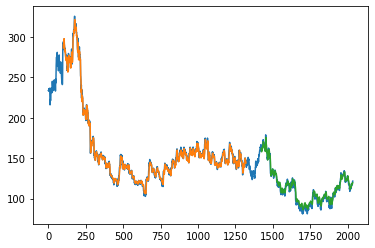

In [71]:
look_back=100

train_predict_plot=np.empty_like(Data1)
train_predict_plot[:,:]=np.nan
train_predict_plot[look_back:len(train_predict)+look_back,:]=train_predict



test_predict_plot=np.empty_like(Data1)
test_predict_plot[:,:]=np.nan
test_predict_plot[len(train_predict)+(look_back*2)+1:len(Data1)-1,:]=test_predict


plt.plot(scaler.inverse_transform(Data1))
plt.plot(train_predict_plot)
plt.plot(test_predict_plot)
plt.show()